In [10]:
from pymatgen import MPRester                       #
                                                    #
with MPRester("qCZVQk878CsirPAezSTx") as mpr:                 # note: remplacer MY_API_KEY par une clef API
                                                    #
    data = mpr.query("mp-23040", ["cif"])[0]        # stocke le fichier cif sous la forme d'un dictionnaire  
    flux = open("Ca2PI_mp-23040.cif", "w")          #
                                                    # 
    for key, value in data.items():                 # écris un fichier cif contenant les données
        flux.write(str(value))                      # du fichier cif stocké dans data
                                                    # 
    flux.close()                                    #                      

In [1]:
from pymatgen.io.cif import CifParser                     #
                                                          #
parser = CifParser("Ca2PI_mp-23040.cif")                  # lis le fichier cif et stocke la  
                                                          # structure conventionnelle dans structure
structure = parser.get_structures(False)[0]               # 

In [18]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator  #
                                                             #
xrd = XRDCalculator()                                        # le rayonnement incident est Cu Ka par défaut
                                                             #
pattern = xrd.get_pattern(structure,False)                   # extraits les pics du difractogramme et
pics = pattern.hkls[:3]                                      # affiche les trois premiers
pics                                                         #

[[{'hkl': (1, 1, 1), 'multiplicity': 2}],
 [{'hkl': (2, 2, 2), 'multiplicity': 2}],
 [{'hkl': (1, 0, 0), 'multiplicity': 6}]]

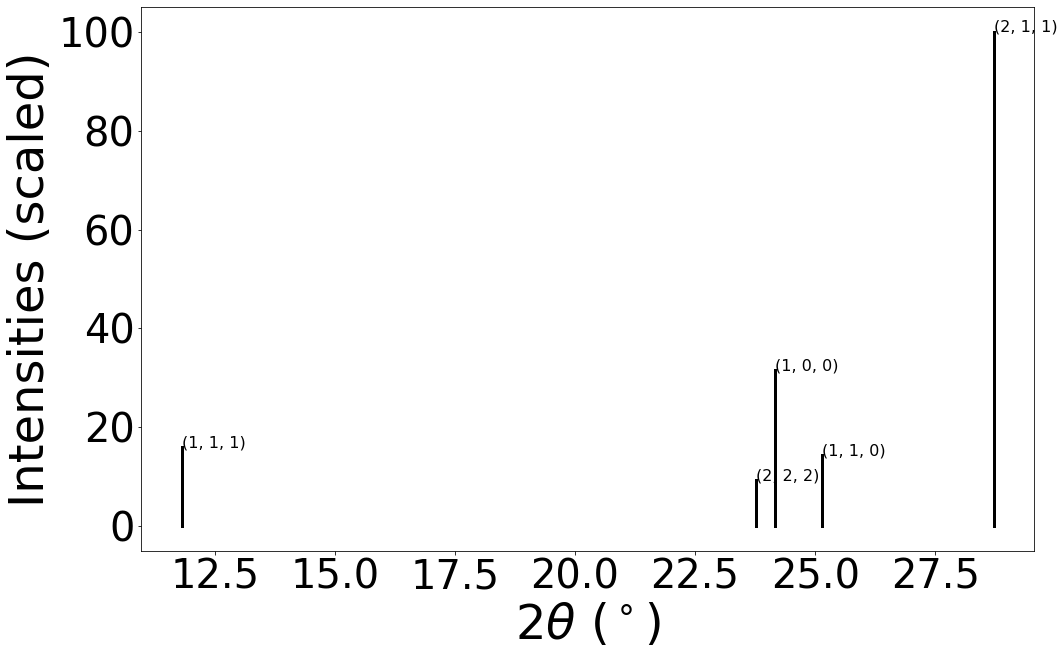

In [19]:
import matplotlib.pyplot as plt       #
                                      #
xrd.get_plot(structure,(0, 30))       # affiche les cinq premiers pics du difractogramme
plt.show()                            #